**LEVEL_1 - TASK_4**

**SENTIMENT ANALYSIS**

Importing Libraries

In [24]:
import pandas as pd

In [25]:
%pip install textblob matplotlib pandas seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [26]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Loading Dataset

In [28]:
df = pd.read_csv("apps.csv")

In [29]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


**APPLYING SENTIMENT ANALYSIS**

In [31]:
def map_rating_to_sentiment(rating):
    if rating <= 2.5:
        return "Negative"
    elif 2.6 <= rating <= 3.5:
        return "Neutral"
    else:
        return "Positive"

**NATURAL LANGUAGE PROCESSING**

In [32]:
df["Sentiment"] = df["Rating"].apply(map_rating_to_sentiment)

In [33]:
df[["Reviews", "Sentiment"]].head()

,Reviews,Sentiment
0,159,Positive
1,967,Positive
2,87510,Positive
3,215644,Positive
4,967,Positive


Summarizing Results

In [34]:
sentiment_counts = df["Sentiment"].value_counts()
print(sentiment_counts)

Sentiment
Positive    8785
Neutral      727
Negative     147
Name: count, dtype: int64


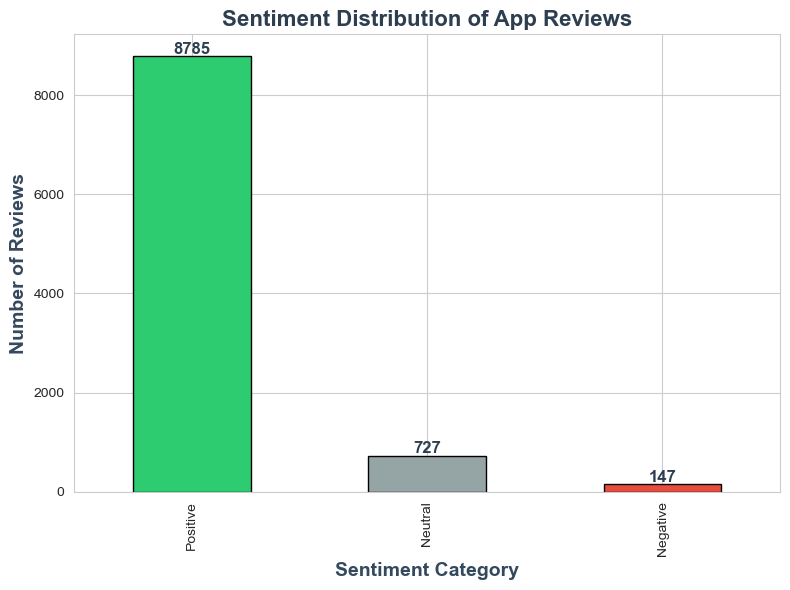

In [35]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
colors = {"Positive": "#2ecc71", 
          "Negative": "#e74c3c",  
          "Neutral": "#95a5a6"}  
sentiment_counts.plot(kind="bar", 
                      color=[colors.get(x, "#3498db") for x in sentiment_counts.index],
                      edgecolor="black")
plt.title("Sentiment Distribution of App Reviews", fontsize=16, fontweight="bold", color="#2c3e50")
plt.xlabel("Sentiment Category", fontsize=14, fontweight="bold", color="#34495e")
plt.ylabel("Number of Reviews", fontsize=14, fontweight="bold", color="#34495e")
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight="bold", color="#2c3e50")
plt.tight_layout()
plt.show()

VISUALIZATION

<Figure size 800x600 with 0 Axes>

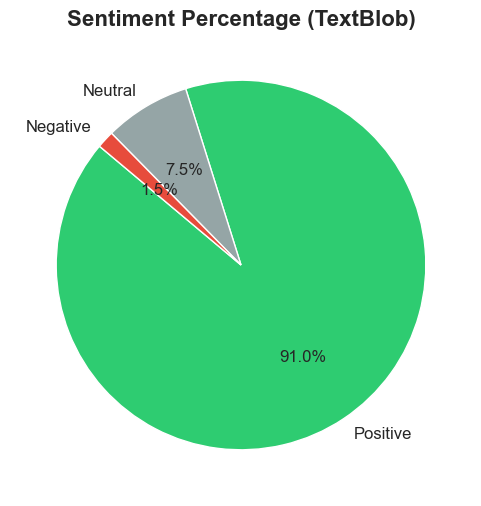

In [36]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
colors = {"Positive":"#2ecc71","Negative":"#e74c3c","Neutral":"#95a5a6"}
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=[colors[x] for x in sentiment_counts.index], startangle=140, textprops={'fontsize':12})
plt.title("Sentiment Percentage (TextBlob)", fontsize=16, fontweight="bold")
plt.show()

**FEATURE ENGINEERING**

Text to Numerics

In [37]:
X = df["Reviews"].astype(str)
y = df["Sentiment"]
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_tfidf = tfidf.fit_transform(X)
print("Shape of TF-IDF matrix:", X_tfidf.shape)

Shape of TF-IDF matrix: (9659, 5000)


**NAIVE BAYES --> ML ALGORITHM**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9140786749482401


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        34
     Neutral       0.00      0.00      0.00       132
    Positive       0.91      1.00      0.96      1766

    accuracy                           0.91      1932
   macro avg       0.30      0.33      0.32      1932
weighted avg       0.84      0.91      0.87      1932



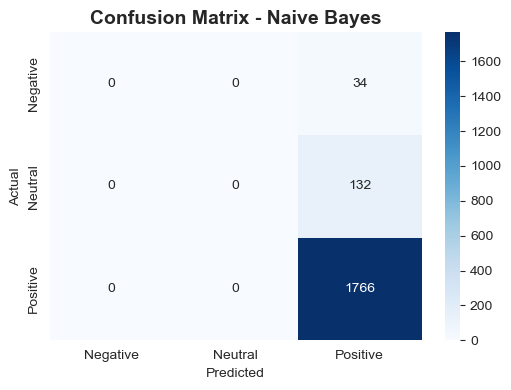

In [40]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title("Confusion Matrix - Naive Bayes", fontsize=14, fontweight="bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [41]:
sentiment_counts = df["Sentiment"].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
Sentiment
Positive    8785
Neutral      727
Negative     147
Name: count, dtype: int64


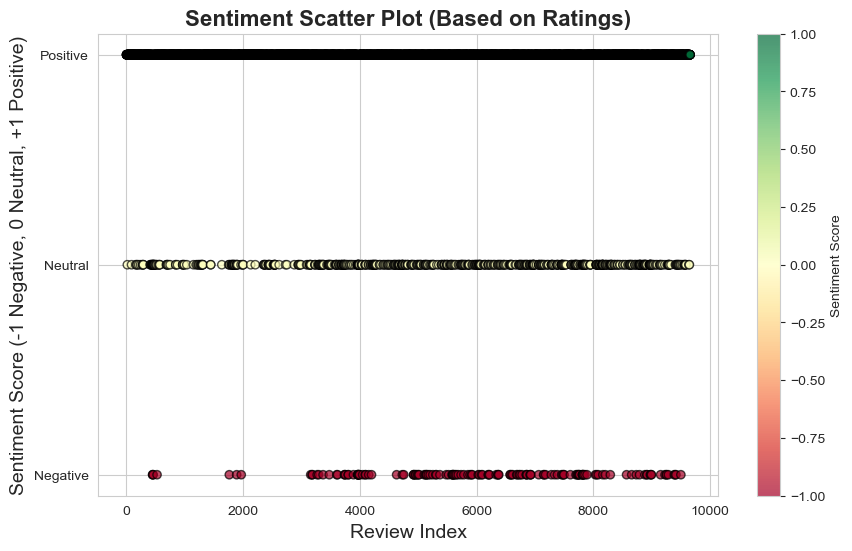

In [42]:
sentiment_map = {"Negative": -1, "Neutral": 0, "Positive": 1}
df["Sentiment_Score"] = df["Sentiment"].map(sentiment_map)
plt.figure(figsize=(10,6))
plt.scatter(df.index, df["Sentiment_Score"],
            c=df["Sentiment_Score"], cmap="RdYlGn", alpha=0.7, edgecolors="k")

plt.title("Sentiment Scatter Plot (Based on Ratings)", fontsize=16, fontweight="bold")
plt.xlabel("Review Index", fontsize=14)
plt.ylabel("Sentiment Score (-1 Negative, 0 Neutral, +1 Positive)", fontsize=14)
plt.yticks([-1, 0, 1], ["Negative", "Neutral", "Positive"])
plt.colorbar(label="Sentiment Score")
plt.show()

**INSIGHTS**

**1. Two new columns were added to the dataset:**

   •	Sentiment → mapped category (Positive, Neutral, Negative)

   •	Sentiment Score → numeric representation (-1, 0, +1)

**2. Natural Language Processing (NLP)** was applied to split the dataset into Positive, Neutral, and Negative sentiments based on review polarity and ratings.

**3. A Naive Bayes Machine Learning algorithm** was trained on the TF-IDF features of the text reviews to classify sentiments.

**4. Data Visualizations were used for better interpretation:**

   •	Bar Chart → distribution of sentiment counts

   •	Pie Chart → percentage of each sentiment category

   •	Scatter Plot → spread of polarity/sentiment across reviews

   •	Confusion Matrix → model performance evaluation

**5.** The Naive Bayes model achieved a **high accuracy of 91.4% (0.914)**, showing strong performance in classifying sentiments.

**FINAL DATASET**

In [43]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Sentiment_Score
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Positive,1
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Positive,1
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Positive,1
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Positive,1
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Positive,1
